# Lesson 1 - Using Convolutional Neural Networks

This notebook is created in order to complete the assignment of [fast.ai](http://www.fast.ai/)'s lesson 1. The dataset used in this assignment is from [Kaggle's Dogs vs Cats Redux competition](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data).

## The Dataset

Dataset can be downloaded here [Kaggle cats and dogs redux](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data)

Let's explore the numbers,

In [1]:
print('Number of test examples:')
!ls ./data/test | wc -l
print('Number of train examples:')
!ls ./data/train | wc -l

Number of test examples:
1
Number of train examples:
25000


The file names are structured like,

In [2]:
!ls ./data/train -U | head -5
!ls ./data/test -U | head -5

dog.2521.jpg
cat.5214.jpg
dog.1552.jpg
dog.10968.jpg
cat.8588.jpg
ls: write error: Broken pipe
test_imgs


Let's restructure the test folder for Keras' `predict_generator` function (it requires a subfolder in `test` directory).

In [3]:
#!ls ./data/test | wc -l

In [4]:
#%mkdir -p ./data/test/test_imgs
#%mv ./data/test/*.jpg ./data/test/test_imgs/

In [5]:
#%ls ./data/test | wc -l
#%ls ./data/test/test_imgs | wc -l

Let's restructure the train directory as it is in fast.ai lesson.

In [6]:
!mkdir -p ./data/train-fast-ai/dogs
!mkdir -p ./data/train-fast-ai/cats

#!rm ./data/train-fast-ai/dogs/* ./data/train-fast-ai/cats/*

!cp -r ./data/train/dog.* ./data/train-fast-ai/dogs/
!cp -r ./data/train/cat.* ./data/train-fast-ai/cats/

Split 1000 examples of cats and dogs for validation

In [7]:
!mkdir -p ./data/valid-fast-ai/dogs
!mkdir -p ./data/valid-fast-ai/cats

#!rm ./data/valid-fast-ai/dogs/* ./data/valid-fast-ai/cats/*

!shuf -n 1000 -e ./data/train-fast-ai/dogs/* | xargs -i mv {} ./data/valid-fast-ai/dogs
!shuf -n 1000 -e ./data/train-fast-ai/cats/* | xargs -i mv {} ./data/valid-fast-ai/cats

Copy some examples for a sample dataset, these will be used to check if code is running.

In [8]:
!mkdir -p ./data/sample-fast-ai/train/dogs
!mkdir -p ./data/sample-fast-ai/train/cats
!mkdir -p ./data/sample-fast-ai/valid/dogs
!mkdir -p ./data/sample-fast-ai/valid/cats

#!rm -r ./data/sample-fast-ai/train/dogs/* ./data/sample-fast-ai/train/cats/*
#!rm -r ./data/sample-fast-ai/valid/dogs/* ./data/sample-fast-ai/valid/cats/*

!shuf -n 100 -e ./data/train-fast-ai/dogs/* | xargs -i cp {} ./data/sample-fast-ai/train/dogs
!shuf -n 100 -e ./data/train-fast-ai/cats/* | xargs -i cp {} ./data/sample-fast-ai/train/cats
!shuf -n 100 -e ./data/train-fast-ai/dogs/* | xargs -i cp {} ./data/sample-fast-ai/valid/dogs
!shuf -n 100 -e ./data/train-fast-ai/cats/* | xargs -i cp {} ./data/sample-fast-ai/valid/cats

Print the numbers,

In [9]:
print('Number of dog examples in train set')
!ls ./data/train-fast-ai/dogs/ | wc -l
print('Number of cat examples in train set')
!ls ./data/train-fast-ai/cats/ | wc -l

Number of dog examples in train set
11500
Number of cat examples in train set
11500


In [10]:
print('Number of dog examples in validation set')
!ls ./data/valid-fast-ai/dogs/ | wc -l
print('Number of cat examples in validation set')
!ls ./data/valid-fast-ai/cats/ | wc -l

Number of dog examples in validation set
1000
Number of cat examples in validation set
1000


In [11]:
print('Number of dog examples in sample/train set')
!ls ./data/sample-fast-ai/train/dogs/ | wc -l
print('Number of cat examples in sample/train set')
!ls ./data/sample-fast-ai/train/cats/ | wc -l
print('Number of dog examples in sample/valid set')
!ls ./data/sample-fast-ai/valid/dogs/ | wc -l
print('Number of cat examples in sample/valid set')
!ls ./data/sample-fast-ai/valid/cats/ | wc -l

Number of dog examples in sample/train set
100
Number of cat examples in sample/train set
100
Number of dog examples in sample/valid set
100
Number of cat examples in sample/valid set
100


## Import pyhton dependencies

In [12]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
from importlib import reload
import numpy as np

## Visualize some examples

Train dataset


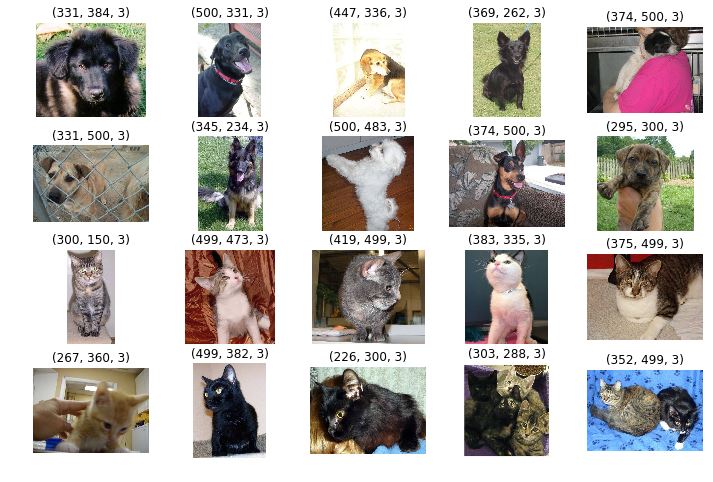

In [13]:
imgs_dogs = glob.glob('./data/train-fast-ai/dogs/*.jpg')
imgs_cats = glob.glob('./data/train-fast-ai/cats/*.jpg')

print('Train dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        img = mpimg.imread(imgs_dogs[i])
        plt.imshow(img)
        plt.title(str(img.shape))
    else:
        img = mpimg.imread(imgs_cats[i])
        plt.imshow(img)
        plt.title(str(img.shape))
    plt.axis('off')
plt.show()
plt.close()

Valid dataset


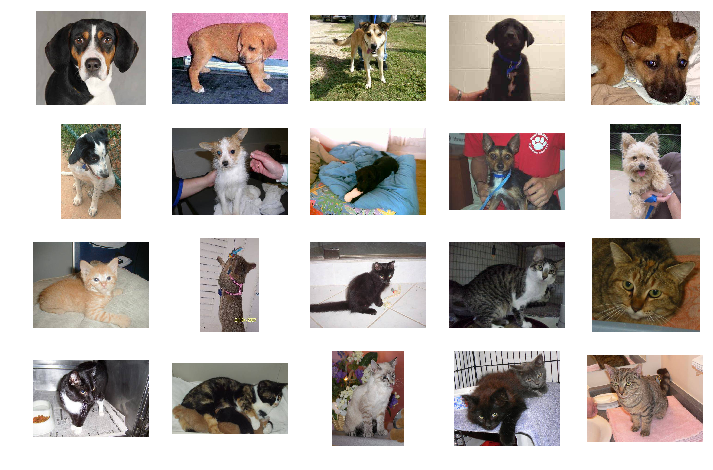

In [14]:
imgs_dogs = glob.glob('./data/valid-fast-ai/dogs/*.jpg')
imgs_cats = glob.glob('./data/valid-fast-ai/cats/*.jpg')

print('Valid dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        plt.imshow(mpimg.imread(imgs_dogs[i]))
    else:
        plt.imshow(mpimg.imread(imgs_cats[i]))
    plt.axis('off')
plt.show()
plt.close()

Sample/train dataset


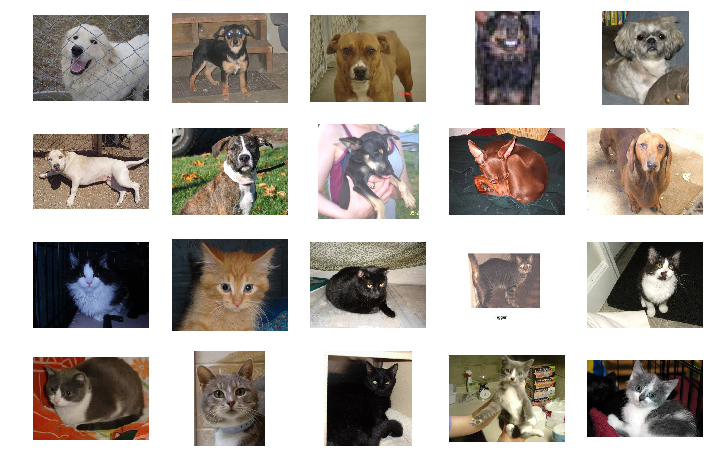

In [15]:
imgs_dogs = glob.glob('./data/sample-fast-ai/train/dogs/*.jpg')
imgs_cats = glob.glob('./data/sample-fast-ai/train/cats/*.jpg')

print('Sample/train dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        plt.imshow(mpimg.imread(imgs_dogs[i]))
    else:
        plt.imshow(mpimg.imread(imgs_cats[i]))
    plt.axis('off')
plt.show()
plt.close()

Sample/valid dataset


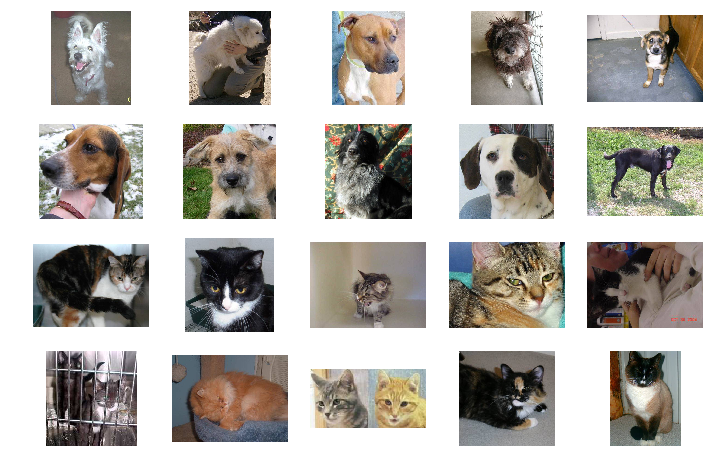

In [16]:
imgs_dogs = glob.glob('./data/sample-fast-ai/valid/dogs/*.jpg')
imgs_cats = glob.glob('./data/sample-fast-ai/valid/cats/*.jpg')

print('Sample/valid dataset')
plt.figure(figsize=(12,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    if i < 10:
        plt.imshow(mpimg.imread(imgs_dogs[i]))
    else:
        plt.imshow(mpimg.imread(imgs_cats[i]))
    plt.axis('off')
plt.show()
plt.close()

## Load Vgg16 model

In [17]:
import vgg16_for_keras2
reload(vgg16_for_keras2)
from vgg16_for_keras2 import Vgg16

Using TensorFlow backend.


In [18]:
# vgg instance
vgg = Vgg16()

## Generator test

In [19]:
path = './data/sample-fast-ai/'
batch_size = 10

In [20]:
generator = vgg.get_batches(path+'train', batch_size=batch_size)

Found 200 images belonging to 2 classes.


In [21]:
batch_test_imgs, batch_test_labels = next(generator)

In [22]:
imgs = np.array(batch_test_imgs).astype(np.uint8)
reshape = imgs.transpose((0,2,3,1))
print(imgs.shape)
print(reshape.shape)

(10, 3, 224, 224)
(10, 224, 224, 3)


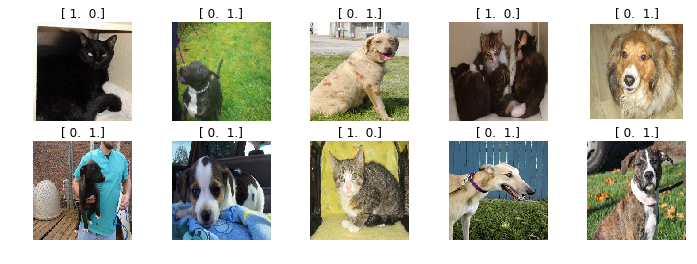

In [23]:
plt.figure(figsize=(12,4))
for i in range(len(imgs)):
    plt.subplot(2,5,i+1)
    plt.imshow(reshape[i])
    plt.axis('off')
    plt.title(str(batch_test_labels[i]))
plt.show()
plt.close()

In [24]:
vgg.predict(imgs, True)

(array([ 0.15298298,  0.08569754,  0.31577727,  0.1987707 ,  0.49385256,
         0.08023614,  0.40915918,  0.15624665,  0.29441926,  0.16456981], dtype=float32),
 array([223, 128, 212, 568, 230, 843, 162, 281, 172, 180]),
 ['schipperke',
  'black_stork',
  'English_setter',
  'fur_coat',
  'Shetland_sheepdog',
  'swing',
  'beagle',
  'tabby',
  'whippet',
  'American_Staffordshire_terrier'])

The category indexes are based on the ordering of categories used in the VGG model.

## Vgg16 finetuning

In [25]:
path = './data/sample-fast-ai/'
batch_size = 32

In [26]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [27]:
batches.samples

200

In [28]:
vgg.finetune(batches)

In [29]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
200/200 [==============================] - 2566s - loss: 0.2717 - acc: 0.9116 - val_loss: 0.3617 - val_acc: 0.8900


In [30]:
%mkdir -p saved
save_path = 'saved/saved_weights_for_sample.h5'

vgg.model.save_weights(save_path)

%ls saved

saved_weights_for_sample.h5


## Predictions

In [31]:
imgs = np.array(batch_test_imgs).astype(np.uint8)
reshape = imgs.transpose((0,2,3,1))
print(imgs.shape)
print(reshape.shape)

(10, 3, 224, 224)
(10, 224, 224, 3)


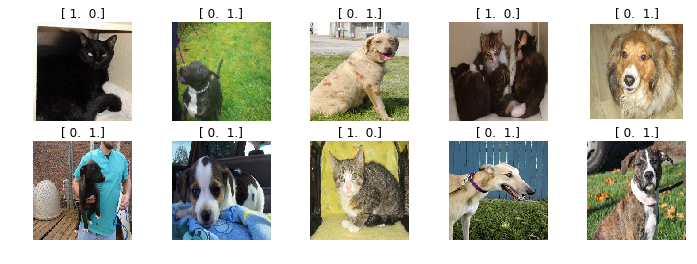

In [32]:
plt.figure(figsize=(12,4))
for i in range(len(imgs)):
    plt.subplot(2,5,i+1)
    plt.imshow(reshape[i])
    plt.axis('off')
    plt.title(str(batch_test_labels[i]))
plt.show()
plt.close()

In [33]:
vgg.predict(imgs, True)

(array([ 0.99980313,  0.99908102,  0.99993813,  0.99989247,  0.97203022,
         0.99883312,  0.99430889,  0.99999607,  1.        ,  0.97262168], dtype=float32),
 array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1]),
 ['cats',
  'dogs',
  'dogs',
  'cats',
  'dogs',
  'dogs',
  'dogs',
  'cats',
  'dogs',
  'dogs'])

## Submit to Kaggle

In [1]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import glob
from importlib import reload
import numpy as np

### Load Model

In [2]:
import vgg16_for_keras2
reload(vgg16_for_keras2)
from vgg16_for_keras2 import Vgg16

Using TensorFlow backend.


In [3]:
vgg = Vgg16()

In [4]:
batch_size = 25

batches = vgg.get_batches('data/train-fast-ai', batch_size=batch_size)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
vgg.finetune(batches)

In [6]:
vgg.model.load_weights('saved/saved_weights_for_sample.h5')

In [7]:
batches, preds = vgg.test(path='./data/test', batch_size=25)

Found 12500 images belonging to 1 classes.


In [8]:
file_names = batches.filenames

In [11]:
file_names[:5]

['test_imgs/10.jpg',
 'test_imgs/11518.jpg',
 'test_imgs/10070.jpg',
 'test_imgs/3382.jpg',
 'test_imgs/1936.jpg']

In [10]:
preds[:5]

array([[  9.52724874e-01,   4.72751334e-02],
       [  9.99999642e-01,   4.03775147e-07],
       [  8.01985562e-01,   1.98014453e-01],
       [  9.99645710e-01,   3.54298507e-04],
       [  1.39986561e-03,   9.98600185e-01]], dtype=float32)

In [44]:
len(preds)

12500


In [12]:
%ls data/test/test_imgs | wc -l

12500


In [14]:
isdog = preds[:,1]

isdog[:5]

array([  4.72751334e-02,   4.03775147e-07,   1.98014453e-01,
         3.54298507e-04,   9.98600185e-01], dtype=float32)

In [15]:
isdog = np.clip(preds[:,1], 0.02, 0.98)

In [16]:
ids = [int(f[10:f.find('.')]) for f in file_names]

ids[:5]

[10, 11518, 10070, 3382, 1936]

In [17]:
subm = np.stack([ids,isdog], axis=1)

subm[:5]

array([[  1.00000000e+01,   4.72751334e-02],
       [  1.15180000e+04,   1.99999996e-02],
       [  1.00700000e+04,   1.98014453e-01],
       [  3.38200000e+03,   1.99999996e-02],
       [  1.93600000e+03,   9.80000019e-01]])

In [18]:
np.savetxt('data/subm_sample.csv', subm, fmt='%d,%.5f', header='id,label', comments='')

In [19]:
subm.shape

(12500, 2)

In [22]:
ordered = subm[subm[:,0].argsort()]

In [23]:
ordered[:5]

array([[ 1.        ,  0.98000002],
       [ 2.        ,  0.98000002],
       [ 3.        ,  0.96219629],
       [ 4.        ,  0.98000002],
       [ 5.        ,  0.02      ]])

In [24]:
np.savetxt('data/subm_sample_ordered.csv', ordered, fmt='%d,%.5f', header='id,label', comments='')

In [ ]:
from IPython.display import FileLink
FileLink('data/subm_sample.csv')